In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 1

# From pipeline to pandas

Get experimental results in a neat pandas DataFrame with performance metrics as columns and experimental specifications as rows.

In [2]:
%aimport pipeline

experiment_dimensions = {
    'classifier': ['adaline', 'naive bayes'],
    'attack': ['ham', 'empty'],
    ('attack_parameters', 'percentage_samples_poisoned'): [0, .1, .2, .3, .4, .5],
    'iteration': range(1, 10+1),
}

DF = pipeline.perform_experiment_batch(experiment_dimensions)


In [3]:
DF

metrics                                                        AUC       FNR  \
classifier  attack percentage_samples_poisoned iteration                       
adaline     ham    0.0                         1          0.591881  0.002513   
                                               2          0.508197  0.000000   
                                               3          0.575893  0.000000   
                                               4          0.550420  0.000000   
                                               5          0.606796  0.000000   
                                               6          0.540650  0.000000   
                                               7          0.581081  0.000000   
                                               8          0.595238  0.000000   
                                               9          0.554622  0.000000   
                                               10         0.546218  0.000000   
                   0.1                         1          0.543860  0.000000   
                                               2          0.548246  0.000000   
                                               3          0.553097  0.000000   
                                               4          0.588235  0.000000   
                                               5          0.600000  0.000000   
                                               6          0.561404  0.000000   
                                               7          0.551402  0.000000   
                                               8          0.525000  0.000000   
                                               9          0.567568  0.000000   
                                               10         0.577273  0.000000   
                   0.2                         1          0.522523  0.000000   
                                               2          0.532110  0.000000   
                                               3          0.526549  0.000000   
                                               4          0.572816  0.000000   
                                               5          0.574257  0.000000   
                                               6          0.509524  0.000000   
                                               7          0.522124  0.000000   
                                               8          0.534653  0.000000   
                                               9          0.526087  0.000000   
                                               10         0.543269  0.000000   
...                                                            ...       ...   
naive bayes empty  0.3                         1          0.744426  0.020408   
                                               2          0.741290  0.026042   
                                               3          0.723410  0.048593   
                                               4          0.754546  0.023018   
                                               5          0.746272  0.015789   
                                               6          0.767152  0.026042   
                                               7          0.725524  0.030769   
                                               8          0.759356  0.040921   
                                               9          0.732587  0.034826   
                                               10         0.739639  0.033766   
                   0.4                         1          0.706487  0.035623   
                                               2          0.721250  0.027500   
                                               3          0.750742  0.045685   
                                               4          0.749358  0.035264   
                                               5          0.754590  0.025907   
                                               6          0.758173  0.048469   
                                               7          0.698921  0.018088   


In [8]:
df = DF

## assuming iteration is at the end
df_mean = df.mean(level=df.index.names[:-1])
df_mean

metrics                                              AUC       FNR       FPR  \
classifier  attack percentage_samples_poisoned                                 
adaline     empty  0.0                          0.597530  0.000000  0.804940   
                   0.1                          0.558537  0.000000  0.882927   
                   0.2                          0.528284  0.000000  0.943432   
                   0.3                          0.521677  0.000000  0.956646   
                   0.4                          0.512887  0.000000  0.974225   
                   0.5                          0.511387  0.000000  0.977227   
            ham    0.0                          0.565100  0.000251  0.869549   
                   0.1                          0.561608  0.000000  0.876783   
                   0.2                          0.536391  0.000000  0.927218   
                   0.3                          0.523967  0.000000  0.952065   
                   0.4                          0.515151  0.000000  0.969697   
                   0.5                          0.510323  0.000000  0.979353   
naive bayes empty  0.0                          0.731036  0.021435  0.516493   
                   0.1                          0.740233  0.024024  0.495510   
                   0.2                          0.746112  0.025594  0.482183   
                   0.3                          0.743420  0.030017  0.483142   
                   0.4                          0.728255  0.031113  0.512376   
                   0.5                          0.737454  0.028335  0.496756   
            ham    0.0                          0.744958  0.022181  0.487903   
                   0.1                          0.733471  0.029667  0.503391   
                   0.2                          0.735405  0.028719  0.500471   
                   0.3                          0.731146  0.023432  0.514277   
                   0.4                          0.733197  0.025848  0.507757   
                   0.5                          0.733781  0.028992  0.503446   

metrics                                         error_test  error_train  
classifier  attack percentage_samples_poisoned                           
adaline     empty  0.0                              0.1740       0.1676  
                   0.1                              0.1892       0.1650  
                   0.2                              0.2070       0.1624  
                   0.3                              0.2090       0.1468  
                   0.4                              0.2098       0.1398  
                   0.5                              0.2140       0.1280  
            ham    0.0                              0.1984       0.1738  
                   0.1                              0.1950       0.1576  
                   0.2                              0.1996       0.1638  
                   0.3                              0.2066       0.1504  
                   0.4                              0.2118       0.1374  
                   0.5                              0.2118       0.1272  
naive bayes empty  0.0                              0.1288       0.1180  
                   0.1                              0.1260       0.1076  
                   0.2                              0.1250       0.1048  
                   0.3                              0.1306       0.0870  
                   0.4                              0.1356       0.0696  
                   0.5                              0.1296       0.0732  
            ham    0.0                              0.1226       0.1242  
                   0.1                              0.1332       0.1044  
                   0.2                              0.1320       0.0976  
                   0.3                              0.1342       0.0796  
                   0.4                              0.1306       0.0778  
                   0.5                              0.1342       0.07

classifier                    adaline           naive bayes          
attack                          empty       ham       empty       ham
percentage_samples_poisoned                                          
0.0                          0.597530  0.565100    0.731036  0.744958
0.1                          0.558537  0.561608    0.740233  0.733471
0.2                          0.528284  0.536391    0.746112  0.735405
0.3                          0.521677  0.523967    0.743420  0.731146
0.4                          0.512887  0.515151    0.728255  0.733197
0.5                          0.511387  0.510323    0.737454  0.733781


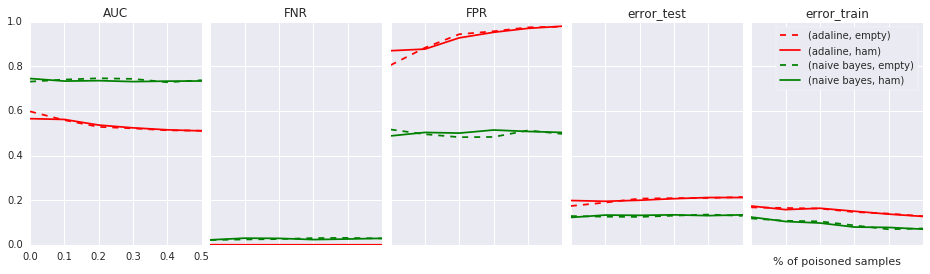

In [11]:
df_plot = df_mean.unstack(['classifier', 'attack'])
print(df_plot['AUC'])

from itertools import product
keys = list(product(*(list(names) for names in df_plot['AUC'].columns.levels)))
style = {}
for k in keys:
    color = 'r' if 'adaline' in k else 'g'
    ls = '-' if 'ham' in k else '--'
    style[k] = '%s%s' % (color, ls)

params = {
    'style': style,
    'ylim': (0, 1),
    'legend': None,
}

fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(16, 4))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

for i, metric in enumerate(df.columns):
    df_plot[metric].plot(ax=axes[i], title=metric, sharey=True, **params)
    axes[i].set_xticklabels([])
    axes[i].set_xlabel('')

axes[0].set_xticklabels(np.arange(0, 0.6, 0.1))
axes[-1].set_xlabel('% of poisoned samples')
axes[-1].legend(frameon=True)

plt.show()

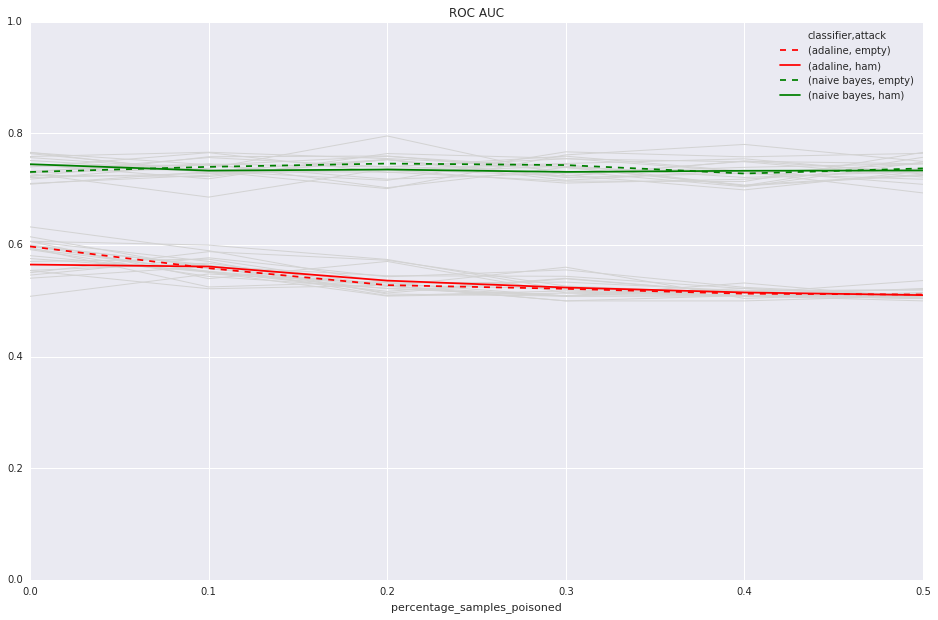

In [32]:
df_plot_iters = df.unstack(['classifier', 'attack', 'iteration'])['AUC']

fig, axis = plt.subplots(1,1, figsize=(16,10))
df_plot_iters.plot(ax=axis, color='lightgray', lw=1, legend=None)
df_plot['AUC'].plot(ax=axis, style=style)

plt.ylim((0, 1))
plt.title('ROC AUC')
plt.show()